In [279]:
#Libraries initialization
import numpy as np
import matplotlib.pyplot as plt
import random as r
import networkx as nx
import scipy.sparse as sp
from collections import defaultdict

In [280]:
#TASK 1
#Adjacency matrix initialization
matrix=np.zeros((100, 100))
n = 200

while n > 0:
    i = r.randint(0,99)
    j = r.randint(0,99)
    if i != j and matrix[i,j] != 1:
        matrix[i,j]=1
        matrix[j,i]=1
        n -= 1

print('Number of ones: ' + str(np.sum(matrix)))
print(matrix)

Number of ones: 400.0
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [281]:
#Adjacency matrix to adjacency list
adjlist = defaultdict(list)
edges = set()
for i, v in enumerate(matrix, 1):
    for j, u in enumerate(v, 1):
        if u != 0 and frozenset([i, j]) not in edges:
            edges.add(frozenset([i, j]))
            adjlist[i].append(j)
print (adjlist)

defaultdict(<class 'list'>, {1: [3, 67, 95], 2: [3, 28, 59], 3: [33, 75], 4: [17, 29, 63, 91], 5: [25, 31, 32, 41, 52, 78], 6: [18, 91], 7: [36], 8: [79], 9: [31, 46, 69, 78, 88, 95, 98], 10: [23, 27, 62, 65, 69, 90, 91], 11: [20, 54, 55, 70], 12: [29, 34], 13: [15, 23, 67, 84], 14: [40, 68, 80], 15: [26, 63], 16: [24, 62, 66], 17: [49, 63, 64, 68, 84, 87, 90], 18: [46, 89], 19: [28, 56, 65, 67, 77, 90], 20: [24, 49, 52], 21: [36, 37, 92], 22: [31, 32, 72, 78, 80, 82], 23: [41, 50, 51, 74, 96], 24: [37, 49, 55, 68, 80, 97], 25: [42, 73, 90], 27: [76], 28: [41, 50, 68, 71, 77, 92], 29: [39, 41, 51, 74, 87], 30: [70], 31: [35, 54, 74, 85, 97], 32: [58, 85], 33: [51, 63, 78, 80], 34: [48, 49, 57, 76, 94, 98], 35: [53, 78], 36: [43, 44, 65], 37: [75, 85], 38: [45, 60, 74, 98], 39: [40], 40: [69], 41: [48, 82], 42: [61, 72], 43: [54, 80], 44: [54, 71, 89], 45: [58, 62, 70, 94, 97], 46: [84], 47: [96], 48: [87, 97], 50: [55, 73, 80], 51: [53], 54: [65, 88], 55: [59, 93], 56: [65, 78, 84], 57

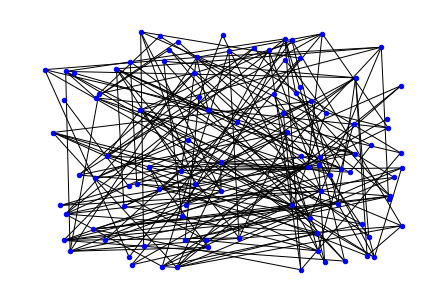

In [282]:
#Graph parameters
def get_matrix_triad(coo_matrix , data=False):
	if not sp.isspmatrix_coo(coo_matrix):
		coo_matrix = sp.coo_matrix(coo_matrix)
	temp = np.vstack((coo_matrix.row , coo_matrix.col , coo_matrix.data)).transpose()
	return temp.tolist()
edags = get_matrix_triad(matrix)

#Graph visualization
G = nx.Graph()
H = nx.path_graph(matrix.shape[0])
G.add_nodes_from(H)
G.add_weighted_edges_from(edags)
colors = np.arange(matrix.shape[0])
nx.draw(G,pos=nx.random_layout(G),node_color='b', node_size = 20)
plt.show()

In [283]:
#TASK 2
#Depth-ﬁrst search
connected_nodes_dfs = []
visited = set()
def dfs(visited, graph, node):  #function for dfs 
    if node not in visited:
        connected_nodes_dfs.append(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

dfs(visited, adjlist, 5)
print(connected_nodes_dfs)
print('Connected nodes lenght: ' + str(len(connected_nodes_dfs)))

[5, 25, 42, 61, 96, 97, 100, 72, 94, 73, 80, 81, 90, 31, 35, 53, 78, 54, 65, 77, 88, 74, 85, 32, 58, 71, 83, 93, 41, 48, 87, 82, 52]
Connected nodes lenght: 33


In [294]:
#Breadth-ﬁrst search
visited = []
queue = []
connected_nodes_bfs = []
i = 0
j = 0

def bfs(visited, graph, node, final):
    visited.append(node)
    queue.append(node)
    k = 0
    m = 0
    while queue and m != final:
        global i, j
        i += k
        j += 1
        k = 0
        m = queue.pop(0)
        connected_nodes_bfs.append(m)
        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
                k = 1


bfs(visited, adjlist, 5, 1000)
print(connected_nodes_bfs)
print('Connected nodes lenght: ' + str(len(connected_nodes_bfs)))
print('Shortest path between ' + str(connected_nodes_bfs[0]) + ' and ' + str(connected_nodes_bfs[len(connected_nodes_bfs) - 1])+ ' nodes: ' + str(j-i))

[5, 25, 31, 32, 41, 52, 78, 42, 73, 90, 35, 54, 74, 85, 97, 58, 48, 82, 61, 72, 80, 53, 65, 88, 77, 100, 71, 81, 87, 93, 96, 94, 83]
Connected nodes lenght: 33
Shortest path between 5 and 83 nodes: 16
